In [1]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import re

In [3]:
color_table = []
with open('/run/media/hanshan/data2/Data/color_table', 'r') as f:
    color_lines = f.readlines()
    color_table.append([item.strip().split(' ') for item in color_lines])
    

In [4]:
color_table = str(color_table).replace('[', ' ').replace(']', ' ')
color_table = eval(color_table)

In [5]:
color_table =[ int(item) for item in color_table]

In [6]:
color_table

[64,
 128,
 64,
 192,
 0,
 128,
 0,
 128,
 192,
 0,
 128,
 64,
 128,
 0,
 0,
 64,
 0,
 128,
 64,
 0,
 192,
 192,
 128,
 64,
 192,
 192,
 128,
 64,
 64,
 128,
 128,
 0,
 192,
 192,
 0,
 64,
 128,
 128,
 64,
 192,
 0,
 192,
 128,
 64,
 64,
 64,
 192,
 128,
 64,
 64,
 0,
 128,
 64,
 128,
 128,
 128,
 192,
 0,
 0,
 192,
 192,
 128,
 128,
 128,
 128,
 128,
 64,
 128,
 192,
 0,
 0,
 64,
 0,
 64,
 64,
 192,
 64,
 128,
 128,
 128,
 0,
 192,
 128,
 192,
 64,
 0,
 64,
 192,
 192,
 0,
 0,
 0,
 0,
 64,
 192,
 0]

# watch label of segment
1. read by cv2's grayscale
2. change to PIL image P mode

In [20]:
data_dir = '/run/media/hanshan/data2/Data/DataSets/CamVid/segment/0001TP_006690.png'

In [7]:
segment = cv2.imread(
    '/home/hanshan/下载/CamVid/segment/0001TP_006690.png'
    , cv2.IMREAD_GRAYSCALE)
np.unique(segment)

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 11], dtype=uint8)

In [21]:
segment = Image.open(data_dir)

In [23]:
np.unique(segment)

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 11], dtype=uint8)

In [18]:
segment = Image.fromarray(segment)
segment.mode

'L'

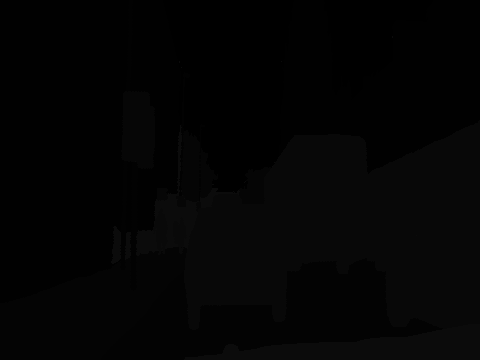

In [9]:
segment

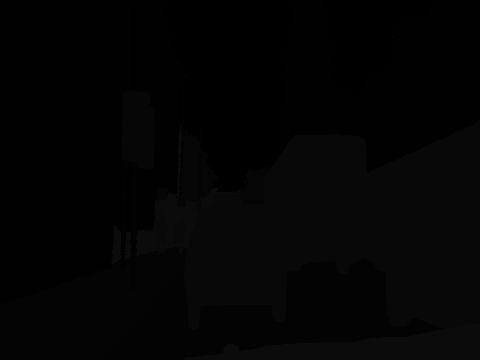

In [10]:
segment = segment.convert('P')
segment

In [11]:
np.unique(segment)

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 11], dtype=uint8)

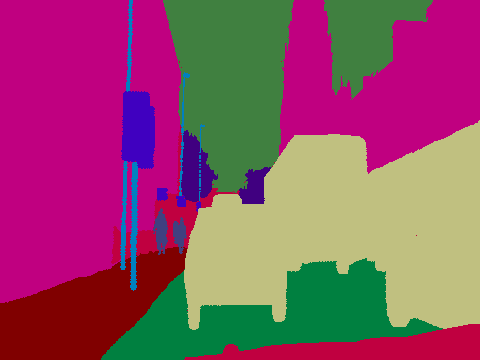

In [12]:
segment.putpalette(color_table)
segment

In [13]:
np.unique(segment)

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 11], dtype=uint8)

In [14]:
np.unique(segment)

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 11], dtype=uint8)

In [16]:
grey = segment.convert('L')
np.unique(grey)
grey = grey.convert('P')
np.unique(grey)

array([ 33,  38,  41,  64,  71,  72,  82,  97, 101, 184], dtype=uint8)

# change gray to Image  P mode

In [9]:
from glob import glob

In [55]:
label_root_dir = '/run/media/hanshan/data2/Data/DataSets/CamVid/segment/'
labels = glob(label_root_dir+'*.png')

In [56]:
len(labels)

701

In [58]:
for label_path in labels:
    label_gray = Image.open(label_path)
    label_p = label_gray.convert('P')
    label_p.putpalette(color_table)
    label_p.save(label_path)

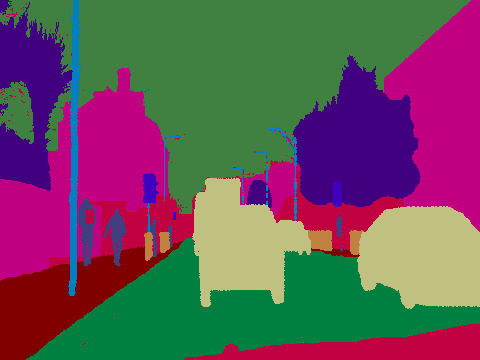

In [45]:
label_p